# Cross-Country Comparison — Benin, Sierra Leone, Togo
Objective: synthesize cleaned datasets and compare solar potential (GHI, DNI, DHI) across countries.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal

# Load cleaned CSVs
benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierraleone = pd.read_csv('../data/sieraleone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

# ensure country column for concatenation
benin['country'] = 'Benin'
sierraleone['country'] = 'SierraLeone'
togo['country'] = 'Togo'

df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)
df_all.shape


(1543517, 20)

## Metric Comparison & Summary Table
Create boxplots for each metric (GHI, DNI, DHI), compute mean/median/std per country, and run a one-way ANOVA (or Kruskal-Wallis if non-normal).


In [12]:
metrics = ['GHI','DNI','DHI']
summary = []
for country, df in df_all.groupby('country'):
    row = {'country': country}
    for m in metrics:
        row[f'{m}_mean'] = df[m].mean()
        row[f'{m}_median'] = df[m].median()
        row[f'{m}_std'] = df[m].std()
    summary.append(row)
summary_df = pd.DataFrame(summary).set_index('country')
summary_df.style.format("{:.2f}")


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
country,,,,,,,,,
Benin,236.23,0.70,328.29,166.90,-0.10,262.08,111.66,0.50,153.10
SierraLeone,185.00,-0.40,279.02,104.13,-0.10,200.95,108.10,-0.60,153.69
Togo,223.86,0.50,317.31,147.98,0.00,247.68,112.78,1.50,151.57


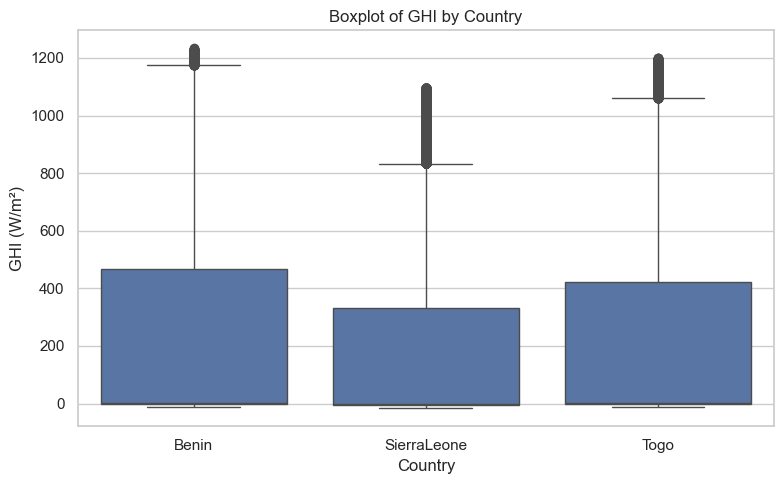

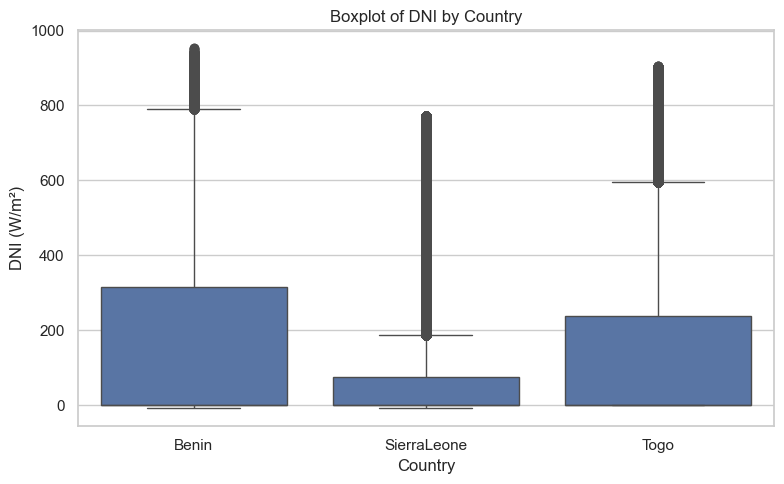

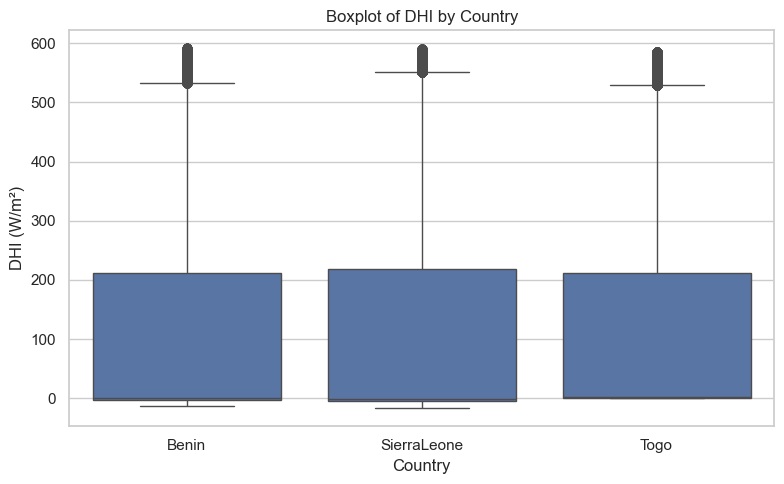

In [13]:
sns.set(style="whitegrid")
for m in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='country', y=m, data=df_all)
    plt.title(f'Boxplot of {m} by Country')
    plt.ylabel(m + ' (W/m²)')
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


## Statistical Testing
Run a one-way ANOVA on GHI across countries to test whether mean GHI differs. If ANOVA assumptions (normality/homoscedasticity) fail, Run Kruskal–Wallis as a non-parametric alternative.


In [14]:
# Prepare samples
ghi_samples = [g['GHI'].dropna().values for _, g in df_all.groupby('country')]

# ANOVA
fstat, pval = f_oneway(*ghi_samples)
print("ANOVA (GHI) F-statistic = {:.4f}, p-value = {:.4e}".format(fstat, pval))

# If p-value small, differences are significant. For robustness, also run Kruskal-Wallis:
hstat, hp = kruskal(*ghi_samples)
print("Kruskal-Wallis (GHI) H-statistic = {:.4f}, p-value = {:.4e}".format(hstat, hp))


ANOVA (GHI) F-statistic = 3833.1842, p-value = 0.0000e+00
Kruskal-Wallis (GHI) H-statistic = 6548.5338, p-value = 0.0000e+00


### Key Observations

- **Benin** shows the **highest mean GHI (236.23 W/m²)**, indicating the strongest solar irradiance potential among the three countries.  
- **Togo** follows with a mean GHI of **223.86 W/m²**, showing similar but slightly lower solar potential compared to Benin.  
- **Sierra Leone** records the **lowest mean GHI (185.00 W/m²)**, suggesting comparatively lower solar energy availability.  



## Key Observations (summary)
List the three most notable results from the above analysis.


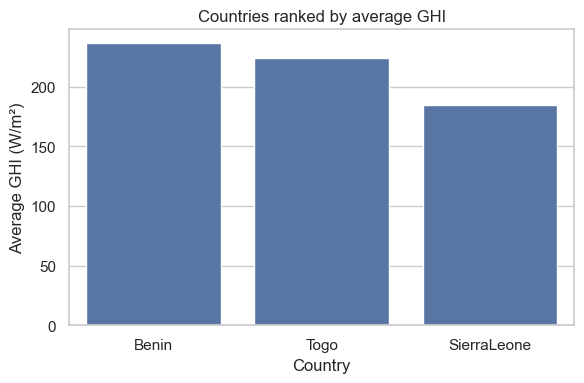

In [15]:
# Bar chart ranking countries by average GHI
rank = summary_df[[f'GHI_mean']].sort_values('GHI_mean', ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=rank.index, y='GHI_mean', data=rank.reset_index())
plt.title('Countries ranked by average GHI')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()
